In [1]:
import sys
import pathlib
import datetime
import xarray as xr
import cftime
import variables
import pandas as pd
import re
import dask
import numpy as np
import os

In [2]:
scratch = pathlib.Path(os.environ['SCRATCH']) / 'dor'
scratch

PosixPath('/pscratch/sd/a/abanihi/dor')

In [3]:
parent_dir = pathlib.Path.cwd().parent
sys.path.append(str(parent_dir))

In [4]:
import atlas

In [5]:
calc = atlas.global_irf_map(cdr_forcing="DOR", vintage="001")
df = calc.df
df

,blueprint,polygon,polygon_master,basin,start_date,cdr_forcing,cdr_forcing_file,simulation_key,refdate,stop_n,wallclock,curtail_output
case,,,,,,,,,,,,
smyle.cdr-atlas-v0.control.001,smyle,NaN,NaN,None,1999-01,None,None,baseline,0347-01-01,16,12:00:00,False
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-01-01_00000.001,smyle,0.0,0.0,North_Atlantic_basin,1999-01,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_North_Atlantic_basin_000_1999-01-01_00000,0347-01-01,15,10:00:00,True
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-04-01_00001.001,smyle,0.0,0.0,North_Atlantic_basin,1999-04,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_North_Atlantic_basin_000_1999-04-01_00001,0347-04-01,15,10:00:00,True
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-07-01_00002.001,smyle,0.0,0.0,North_Atlantic_basin,1999-07,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_North_Atlantic_basin_000_1999-07-01_00002,0347-07-01,15,10:00:00,True
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-10-01_00003.001,smyle,0.0,0.0,North_Atlantic_basin,1999-10,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_North_Atlantic_basin_000_1999-10-01_00003,0347-10-01,15,10:00:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...
smyle.cdr-atlas-v0.glb-dor_Southern_Ocean_038_1999-10-01_02755.001,smyle,38.0,688.0,Southern_Ocean,1999-10,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_Southern_Ocean_038_1999-10-01_02755,0347-10-01,15,10:00:00,True
smyle.cdr-atlas-v0.glb-dor_Southern_Ocean_039_1999-01-01_02756.001,smyle,39.0,689.0,Southern_Ocean,1999-01,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_Southern_Ocean_039_1999-01-01_02756,0347-01-01,15,10:00:00,True
smyle.cdr-atlas-v0.glb-dor_Southern_Ocean_039_1999-04-01_02757.001,smyle,39.0,689.0,Southern_Ocean,1999-04,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_Southern_Ocean_039_1999-04-01_02757,0347-04-01,15,10:00:00,True


In [6]:
%%time

data = calc.df_case_status
done = data.loc[data.archive]

done_cases = done.index.to_list()
done_cases.remove('smyle.cdr-atlas-v0.control.001')
len(done_cases)

CPU times: user 1.57 s, sys: 1.51 s, total: 3.07 s
Wall time: 3min 54s


2263

In [7]:
done_df = df.loc[done_cases]
done_df

,blueprint,polygon,polygon_master,basin,start_date,cdr_forcing,cdr_forcing_file,simulation_key,refdate,stop_n,wallclock,curtail_output
case,,,,,,,,,,,,
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-01-01_00000.001,smyle,0.0,0.0,North_Atlantic_basin,1999-01,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_North_Atlantic_basin_000_1999-01-01_00000,0347-01-01,15,10:00:00,True
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-04-01_00001.001,smyle,0.0,0.0,North_Atlantic_basin,1999-04,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_North_Atlantic_basin_000_1999-04-01_00001,0347-04-01,15,10:00:00,True
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-07-01_00002.001,smyle,0.0,0.0,North_Atlantic_basin,1999-07,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_North_Atlantic_basin_000_1999-07-01_00002,0347-07-01,15,10:00:00,True
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_000_1999-10-01_00003.001,smyle,0.0,0.0,North_Atlantic_basin,1999-10,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_North_Atlantic_basin_000_1999-10-01_00003,0347-10-01,15,10:00:00,True
smyle.cdr-atlas-v0.glb-dor_North_Atlantic_basin_001_1999-01-01_00004.001,smyle,1.0,1.0,North_Atlantic_basin,1999-01,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_North_Atlantic_basin_001_1999-01-01_00004,0347-01-01,15,10:00:00,True
...,...,...,...,...,...,...,...,...,...,...,...,...
smyle.cdr-atlas-v0.glb-dor_Southern_Ocean_025_1999-10-01_02703.001,smyle,25.0,675.0,Southern_Ocean,1999-10,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_Southern_Ocean_025_1999-10-01_02703,0347-10-01,15,10:00:00,True
smyle.cdr-atlas-v0.glb-dor_Southern_Ocean_026_1999-01-01_02704.001,smyle,26.0,676.0,Southern_Ocean,1999-01,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_Southern_Ocean_026_1999-01-01_02704,0347-01-01,15,10:00:00,True
smyle.cdr-atlas-v0.glb-dor_Southern_Ocean_026_1999-04-01_02705.001,smyle,26.0,676.0,Southern_Ocean,1999-04,DOR,/global/cfs/projectdirs/m4746/Projects/OAE-Eff...,glb-dor_Southern_Ocean_026_1999-04-01_02705,0347-04-01,15,10:00:00,True


In [8]:
def glob_nc_files(base_path: str | pathlib.Path, case:str):
    base_path = pathlib.Path(base_path)
    print("Globbing files (this may take a while)...")
    pattern = base_path / case / 'ocn' / 'hist' / '*.pop.h.*.nc'
    nc_files = sorted(base_path.glob(str(pattern.relative_to(base_path))))
    return nc_files


In [9]:
base_directory = pathlib.Path('/global/cfs/projectdirs/m4746/Projects/Ocean-CDR-Atlas-v0/data/archive')

In [10]:
nc_files = glob_nc_files(base_path=base_directory, case='smyle.cdr-atlas-v0.glb-dor_South_275_1999-01-01_02500.001')

Globbing files (this may take a while)...


In [11]:
len(nc_files)

180

## Add coordinate information and expand dimensions

In [12]:
def get_year_and_month(ds):
    value = ds.time_bound.isel(d2=0).data.item()
    year = value.year
    month = value.month
    return year, month
    

def set_coords(ds: xr.Dataset) -> xr.Dataset:
    return ds.set_coords(variables.COORDS)

def get_case_metadata(case:str) -> pd.Series:
    case_metadata = done_df.loc[case]
    return case_metadata

def add_additional_coords(ds: xr.Dataset):
    case = ds.title
    case_metadata = get_case_metadata(case)
    
    # add as an integer coordinate
    polygon_id_coord = xr.DataArray(
        name='polygon_id', 
        dims='polygon_id', 
        data=[int(case_metadata.polygon_master)], 
        attrs={'long_name': "polygon ID"},
    )

    # injenction date
    injection_date_coord = xr.DataArray(
        data=[cftime.DatetimeNoLeap.strptime(case_metadata.start_date, '%Y-%m', calendar='noleap', has_year_zero=True)],
        dims=['injection_date'],
        attrs={'long_name': "injection date"}
    )

    # add elapsed time coord
    year, month = get_year_and_month(ds)
    current_year = 1999 + int(year) - int('0347')  # all simulations start in the same year
    current_time = cftime.datetime(year=current_year, month=int(month), day=1, calendar='noleap', has_year_zero=True)
    # print(f'current_date: {current_time}')

    injection_date = injection_date_coord.data[0]
   
    elapsed_time = current_time - injection_date

    elapsed_time_coord = xr.DataArray(
        data=[elapsed_time], 
        dims=['elapsed_time'],
    )

    renamed = ds.drop_indexes('time').rename_dims(time='elapsed_time')
    

    return renamed.assign_coords(
        polygon_id=polygon_id_coord,
        injection_date=injection_date_coord,
        elapsed_time=elapsed_time_coord
    )

def expand_ensemble_dims(ds: xr.Dataset) -> xr.Dataset:
    """Add new dimensions across the ensemble"""

    copied = ds.copy()

    # all data variables should be ensemble variables
    for name in list(ds.data_vars):
        copied[name] = copied[name].expand_dims(['polygon_id', 'injection_date'])

    # absolute time is a function of injection_date because of the different starting times
    copied['time'] = copied['time'].expand_dims(['injection_date'])
    copied['time_bound'] = copied['time_bound'].expand_dims(['injection_date'])
            
    return copied

In [13]:
path = nc_files[146]
path

PosixPath('/global/cfs/projectdirs/m4746/Projects/Ocean-CDR-Atlas-v0/data/archive/smyle.cdr-atlas-v0.glb-dor_South_275_1999-01-01_02500.001/ocn/hist/smyle.cdr-atlas-v0.glb-dor_South_275_1999-01-01_02500.001.pop.h.0359-03.nc')

In [14]:
expanded = xr.open_dataset(path, engine='netcdf4').pipe(set_coords).pipe(add_additional_coords).pipe(expand_ensemble_dims)
expanded

/tmp/ipykernel_1529747/2715511308.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  expanded = xr.open_dataset(path, engine='netcdf4').pipe(set_coords).pipe(add_additional_coords).pipe(expand_ensemble_dims)


<xarray.Dataset> Size: 478MB
Dimensions:                     (injection_date: 1, elapsed_time: 1, d2: 2,
                                 z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                                 z_w_bot: 60, nlat: 384, nlon: 320,
                                 polygon_id: 1)
Coordinates: (12/64)
    time_bound                  (injection_date, elapsed_time, d2) object 16B ...
    time                        (injection_date, elapsed_time) object 8B 0359...
  * z_t                         (z_t) float32 240B 500.0 1.5e+03 ... 5.375e+05
  * z_t_150m                    (z_t_150m) float32 60B 500.0 ... 1.45e+04
  * z_w                         (z_w) float32 240B 0.0 1e+03 ... 5e+05 5.25e+05
  * z_w_top                     (z_w_top) float32 240B 0.0 1e+03 ... 5.25e+05
    ...                          ...
    sflux_factor                float64 8B ...
    nsurface_t                  float64 8B ...
    nsurface_u                  float64 8B ...
  * elapsed_time                (elapsed_time) timedelta64[ns] 8B 4439 days
  * polygon_id                  (polygon_id) int64 8B 625
  * injection_date              (injection_date) object 8B 1999-01-01 00:00:00
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/46)
    CO3                         (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    HCO3                        (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    H2CO3                       (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    pH_3D                       (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    CO3_ALT_CO2                 (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    pH_3D_ALT_CO2               (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    ...                          ...
    STF_ALK_ALT_CO2             (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    IAGE                        (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    tend_zint_100m_DIC          (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    tend_zint_100m_DIC_ALT_CO2  (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    tend_zint_100m_ALK          (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    tend_zint_100m_ALK_ALT_CO2  (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
Attributes:
    title:             smyle.cdr-atlas-v0.glb-dor_South_275_1999-01-01_02500.001
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2025-02-05 at 21:01:28.2
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

## Compute anomalies

In [15]:
def compute_anomalies(ds: xr.Dataset) -> xr.Dataset:
    """Subtract counterfactual from experimental values, and leave only these anomalies in the resulting dataset."""

    # do this manually instead of a loop over variable names because there are too many variable names that don't follow a consistent pattern

    def compute_anomaly_for_variable(ds, name, alt_name, new_name):
        ds[new_name] = ds[name] - ds[alt_name]
        ds[new_name].attrs = ds[name].attrs
        ds = ds.drop_vars([name, alt_name], errors='raise')
        return ds

    ds = compute_anomaly_for_variable(ds, name="DIC", alt_name="DIC_ALT_CO2", new_name="DIC_ANOM")
    ds = compute_anomaly_for_variable(ds, name="ALK", alt_name="ALK_ALT_CO2", new_name="ALK_ANOM")
    ds = compute_anomaly_for_variable(ds, name="FG_CO2", alt_name="FG_ALT_CO2", new_name="FG_ANOM")
    ds = compute_anomaly_for_variable(ds, name="PH", alt_name="PH_ALT_CO2", new_name="PH_ANOM")
    ds = compute_anomaly_for_variable(ds, name="CO2STAR", alt_name="CO2STAR_ALT_CO2", new_name="CO2STAR_ANOM")
    ds = compute_anomaly_for_variable(ds, name="CO3", alt_name="CO3_ALT_CO2", new_name="CO3_ANOM")
    ds = compute_anomaly_for_variable(ds, name="pH_3D", alt_name="pH_3D_ALT_CO2", new_name="pH_3D_ANOM")
    ds = compute_anomaly_for_variable(ds, name="DCO2STAR", alt_name="DCO2STAR_ALT_CO2", new_name="DCO2STAR_ANOM")
    ds = compute_anomaly_for_variable(ds, name="pCO2SURF", alt_name="pCO2SURF_ALT_CO2", new_name="pCO2SURF_ANOM")
    ds = compute_anomaly_for_variable(ds, name="DpCO2", alt_name="DpCO2_ALT_CO2", new_name="DpCO2_ANOM")
    ds = compute_anomaly_for_variable(ds, name="DIC_zint_100m", alt_name="DIC_ALT_CO2_zint_100m", new_name="DIC_ANOM_zint_100m")
    ds = compute_anomaly_for_variable(ds, name="ALK_zint_100m", alt_name="ALK_ALT_CO2_zint_100m", new_name="ALK_ANOM_zint_100m")
    ds = compute_anomaly_for_variable(ds, name="tend_zint_100m_DIC", alt_name="tend_zint_100m_DIC_ALT_CO2", new_name="tend_zint_100m_DIC_ANOM")
    ds = compute_anomaly_for_variable(ds, name="tend_zint_100m_ALK", alt_name="tend_zint_100m_ALK_ALT_CO2", new_name="tend_zint_100m_ALK_ANOM")
    ds = compute_anomaly_for_variable(ds, name="STF_ALK", alt_name="STF_ALK_ALT_CO2", new_name="STF_ALK_ANOM")
    
    return ds

In [16]:
anomalies = compute_anomalies(expanded)
anomalies

<xarray.Dataset> Size: 355MB
Dimensions:                   (injection_date: 1, elapsed_time: 1, d2: 2,
                               z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                               z_w_bot: 60, nlat: 384, nlon: 320, polygon_id: 1)
Coordinates: (12/64)
    time_bound                (injection_date, elapsed_time, d2) object 16B 0...
    time                      (injection_date, elapsed_time) object 8B 0359-0...
  * z_t                       (z_t) float32 240B 500.0 1.5e+03 ... 5.375e+05
  * z_t_150m                  (z_t_150m) float32 60B 500.0 1.5e+03 ... 1.45e+04
  * z_w                       (z_w) float32 240B 0.0 1e+03 ... 5e+05 5.25e+05
  * z_w_top                   (z_w_top) float32 240B 0.0 1e+03 ... 5.25e+05
    ...                        ...
    sflux_factor              float64 8B ...
    nsurface_t                float64 8B ...
    nsurface_u                float64 8B ...
  * elapsed_time              (elapsed_time) timedelta64[ns] 8B 4439 days
  * polygon_id                (polygon_id) int64 8B 625
  * injection_date            (injection_date) object 8B 1999-01-01 00:00:00
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/31)
    HCO3                      (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    H2CO3                     (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    co3_sat_calc              (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    co3_sat_arag              (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    ALK_RESTORE_TEND          (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    ALK_ALT_CO2_RESTORE_TEND  (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    ...                        ...
    DpCO2_ANOM                (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    DIC_ANOM_zint_100m        (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    ALK_ANOM_zint_100m        (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    tend_zint_100m_DIC_ANOM   (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    tend_zint_100m_ALK_ANOM   (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    STF_ALK_ANOM              (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
Attributes:
    title:             smyle.cdr-atlas-v0.glb-dor_South_275_1999-01-01_02500.001
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2025-02-05 at 21:01:28.2
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

## Quick check for polygon's correctness

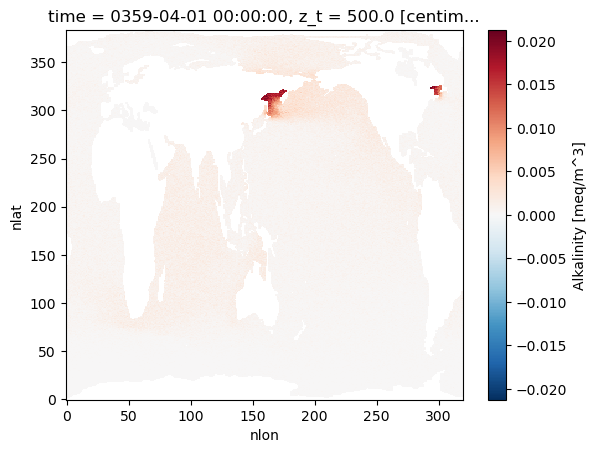

In [17]:
anomalies['ALK_ANOM'].isel(z_t=0).plot();

In [18]:
dask.utils.format_bytes(anomalies.nbytes)

'338.44 MiB'

## Fix encoding

In [19]:
def set_encoding(ds: xr.Dataset) -> xr.Dataset:

    #ds = ds.drop_encoding()
    
    # merge encodings to include existing time encoding as well as previous compression encoding
    for name, var in ds.variables.items():

        # avoids some very irritating behaviour causing the netCDF files to be internally chunked
        if "original_shape" in ds[name].encoding:
            del ds[name].encoding["original_shape"]
        
        if np.issubdtype(var.dtype, np.floating):  # don't try to compress things that aren't floats
            ds[name].encoding["zlib"] = True
            ds[name].encoding["complevel"] = 4

        if var.ndim == 6:
            _3D_CHUNKS = (1, 1, 1, 60, 384, 320)
            #ds[name] = ds[name].chunk(_3D_CHUNKS)
            ds[name].encoding['chunksizes'] = _3D_CHUNKS
        elif var.ndim == 5:
            _2D_CHUNKS = (1, 1, 1, 384, 320)
            #ds[name] = ds[name].chunk(_2D_CHUNKS)
            ds[name].encoding['chunksizes'] = _2D_CHUNKS
    
    return ds

In [20]:
encoded = anomalies.pipe(set_encoding)
encoded

<xarray.Dataset> Size: 355MB
Dimensions:                   (injection_date: 1, elapsed_time: 1, d2: 2,
                               z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                               z_w_bot: 60, nlat: 384, nlon: 320, polygon_id: 1)
Coordinates: (12/64)
    time_bound                (injection_date, elapsed_time, d2) object 16B 0...
    time                      (injection_date, elapsed_time) object 8B 0359-0...
  * z_t                       (z_t) float32 240B 500.0 1.5e+03 ... 5.375e+05
  * z_t_150m                  (z_t_150m) float32 60B 500.0 1.5e+03 ... 1.45e+04
  * z_w                       (z_w) float32 240B 0.0 1e+03 ... 5e+05 5.25e+05
  * z_w_top                   (z_w_top) float32 240B 0.0 1e+03 ... 5.25e+05
    ...                        ...
    sflux_factor              float64 8B ...
    nsurface_t                float64 8B ...
    nsurface_u                float64 8B ...
  * elapsed_time              (elapsed_time) timedelta64[ns] 8B 4439 days
  * polygon_id                (polygon_id) int64 8B 625
  * injection_date            (injection_date) object 8B 1999-01-01 00:00:00
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/31)
    HCO3                      (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    H2CO3                     (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    co3_sat_calc              (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    co3_sat_arag              (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    ALK_RESTORE_TEND          (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    ALK_ALT_CO2_RESTORE_TEND  (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    ...                        ...
    DpCO2_ANOM                (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    DIC_ANOM_zint_100m        (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    ALK_ANOM_zint_100m        (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    tend_zint_100m_DIC_ANOM   (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    tend_zint_100m_ALK_ANOM   (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    STF_ALK_ANOM              (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
Attributes:
    title:             smyle.cdr-atlas-v0.glb-dor_South_275_1999-01-01_02500.001
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2025-02-05 at 21:01:28.2
    cell_methods:      cell_methods = time: mean ==> the variable values are ...

In [21]:
encoded.CO3_ANOM.encoding, encoded['DCO2STAR_ANOM'].encoding

({'zlib': True, 'complevel': 4, 'chunksizes': (1, 1, 1, 60, 384, 320)},
 {'zlib': True, 'complevel': 4, 'chunksizes': (1, 1, 1, 384, 320)})

In [22]:
def save_to_netcdf(
    ds: xr.Dataset, 
    out_filepath: str,
) -> None:
    ds.to_netcdf(out_filepath, format='NETCDF4')

In [23]:
save_to_netcdf(encoded, out_filepath=f'{scratch}/compressed-anomalies-test.nc')

In [24]:
!du -ch {scratch}/compressed-anomalies-test.nc

89M	/pscratch/sd/a/abanihi/dor/compressed-anomalies-test.nc
89M	total


In [25]:
!du -ch {path}

455M	/global/cfs/projectdirs/m4746/Projects/Ocean-CDR-Atlas-v0/data/archive/smyle.cdr-atlas-v0.glb-dor_South_275_1999-01-01_02500.001/ocn/hist/smyle.cdr-atlas-v0.glb-dor_South_275_1999-01-01_02500.001.pop.h.0359-03.nc
455M	total


## Whole pipeline for any task

In [28]:
def open_compress_and_save_file(filepath: str | pathlib.Path, out_path_prefix: str | pathlib.Path) -> None:
    ds = (xr.open_dataset(filepath, engine='netcdf4')
          .pipe(set_coords)
          .pipe(add_additional_coords)
          .pipe(expand_ensemble_dims)
          .pipe(compute_anomalies)
          .pipe(set_encoding)
         )

    polygon_id = ds.polygon_id.data.item()
    injection_month = ds.injection_date.dt.month.data.item()
    injection_year = ds.injection_date.dt.year.data.item()
    year, month = get_year_and_month(ds)

    # Pad the values with zeros
    padded_polygon_id = f"{polygon_id:03d}"
    padded_injection_month = f"{injection_month:02d}"
    padded_injection_year = f"{injection_year:04d}"
    padded_year = f"{year:04d}"
    padded_month = f"{month:02d}"

    out_dir = pathlib.Path(out_path_prefix) / f"{padded_polygon_id}/{padded_injection_month}/"
    out_dir.mkdir(parents=True, exist_ok=True)
    out_filepath = out_dir / f"smyle.cdr-atlas-v0.glb-dor.{padded_polygon_id}-{padded_injection_year}-{padded_injection_month}.pop.h.{padded_year}-{padded_month}.nc"
    save_to_netcdf(ds, out_filepath=out_filepath)
    print(f"""
🎉 Processing Complete! 🎉
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 Polygon ID:       {padded_polygon_id}
💉 Injection Date:   {padded_injection_year}-{padded_injection_month}
📅 Processed Period: {padded_year}-{padded_month}
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📁 Input File:
   {filepath}
📁 Output File:
   {out_filepath}
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
✅ File saved successfully!
    """)

    ds.close()
    return ds

In [29]:
%%time
out_path_prefix = scratch / "compressed" / "anomalies"

ds = open_compress_and_save_file(nc_files[53], out_path_prefix=out_path_prefix)
ds

/tmp/ipykernel_1529747/1229904669.py:2: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = (xr.open_dataset(filepath, engine='netcdf4')



🎉 Processing Complete! 🎉
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📊 Polygon ID:       625
💉 Injection Date:   1999-01
📅 Processed Period: 0351-06
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📁 Input File:
   /global/cfs/projectdirs/m4746/Projects/Ocean-CDR-Atlas-v0/data/archive/smyle.cdr-atlas-v0.glb-dor_South_275_1999-01-01_02500.001/ocn/hist/smyle.cdr-atlas-v0.glb-dor_South_275_1999-01-01_02500.001.pop.h.0351-06.nc
📁 Output File:
   /pscratch/sd/a/abanihi/dor/compressed/anomalies/625/01/smyle.cdr-atlas-v0.glb-dor.625-1999-01.pop.h.0351-06.nc
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
✅ File saved successfully!
    
CPU times: user 5.66 s, sys: 1.3 s, total: 6.95 s
Wall time: 7.04 s


<xarray.Dataset> Size: 355MB
Dimensions:                   (injection_date: 1, elapsed_time: 1, d2: 2,
                               z_t: 60, z_t_150m: 15, z_w: 60, z_w_top: 60,
                               z_w_bot: 60, nlat: 384, nlon: 320, polygon_id: 1)
Coordinates: (12/64)
    time_bound                (injection_date, elapsed_time, d2) object 16B 0...
    time                      (injection_date, elapsed_time) object 8B 0351-0...
  * z_t                       (z_t) float32 240B 500.0 1.5e+03 ... 5.375e+05
  * z_t_150m                  (z_t_150m) float32 60B 500.0 1.5e+03 ... 1.45e+04
  * z_w                       (z_w) float32 240B 0.0 1e+03 ... 5e+05 5.25e+05
  * z_w_top                   (z_w_top) float32 240B 0.0 1e+03 ... 5.25e+05
    ...                        ...
    sflux_factor              float64 8B ...
    nsurface_t                float64 8B ...
    nsurface_u                float64 8B ...
  * elapsed_time              (elapsed_time) timedelta64[ns] 8B 1611 days
  * polygon_id                (polygon_id) int64 8B 625
  * injection_date            (injection_date) object 8B 1999-01-01 00:00:00
Dimensions without coordinates: d2, nlat, nlon
Data variables: (12/31)
    HCO3                      (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    H2CO3                     (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    co3_sat_calc              (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    co3_sat_arag              (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    ALK_RESTORE_TEND          (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    ALK_ALT_CO2_RESTORE_TEND  (polygon_id, injection_date, elapsed_time, z_t, nlat, nlon) float32 29MB ...
    ...                        ...
    DpCO2_ANOM                (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    DIC_ANOM_zint_100m        (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    ALK_ANOM_zint_100m        (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    tend_zint_100m_DIC_ANOM   (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    tend_zint_100m_ALK_ANOM   (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
    STF_ALK_ANOM              (polygon_id, injection_date, elapsed_time, nlat, nlon) float32 492kB ...
Attributes:
    title:             smyle.cdr-atlas-v0.glb-dor_South_275_1999-01-01_02500.001
    history:           none
    Conventions:       CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-cu...
    time_period_freq:  month_1
    model_doi_url:     https://doi.org/10.5065/D67H1H0V
    contents:          Diagnostic and Prognostic Variables
    source:            CCSM POP2, the CCSM Ocean Component
    revision:          $Id$
    calendar:          All years have exactly  365 days.
    start_time:        This dataset was created on 2025-02-05 at 17:53:29.4
    cell_methods:      cell_methods = time: mean ==> the variable values are ...